#### 01. 데이터 탐색 및 준비 (Olist DW 설계)

> 이 노트북은 Olist 이커머스 데이터셋을 기반으로,   
> 데이터 웨어하우스 설계를 위한 사전 탐색 및 품질 점검을 수행합니다.

#### 02. 데이터 불러오기 및 요약

In [118]:
import os
import pandas as pd

# 데이터 경로 지정
DATA_DIR = r'C:\Users\WD\Desktop\DW_Project\01_raw_data'
DATA_DIR_CLEAN = r'C:\Users\WD\Desktop\DW_Project\00_cleand_data'

# 폴더 내 CSV 파일 로드
csv_files = [f for f in os.listdir(DATA_DIR) if f.endswith('.csv')]
dataframes = {
    os.path.splitext(f)[0]: pd.read_csv(os.path.join(DATA_DIR, f))
    for f in csv_files
}

In [54]:
# 테이블별 행 수 및 열 수 요약
summary = []
for name, df in dataframes.items():
    summary.append((name, df.shape[0], df.shape[1]))
    
pd.DataFrame(summary, columns=['Table', 'Rows', 'Columns'])

,Table,Rows,Columns
0,customers,99441,5
1,geolocation,1000163,5
2,orders,99441,8
3,order_items,112650,7
4,order_payments,103886,5
5,order_reviews,99224,7
6,products,32951,9
7,product_category_name_translation,71,2
8,sellers,3095,4


In [55]:
# 각 테이블의 주요 컬럼 미리 보기
for name, df in dataframes.items():
    print(f"\n📌 {name}")
    display(df.head(2))


📌 customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP



📌 geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP



📌 orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00



📌 order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93



📌 order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39



📌 order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13



📌 products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0



📌 product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories



📌 sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


#### 03. 테이블 간 관계 요약

| 관계 유형 | 출발 테이블 → 도착 테이블                                          | 키 컬럼                    | 설명                          |
| ----- | -------------------------------------------------------- | ----------------------- | --------------------------- |
| `1:N` | `customers` → `orders`                                   | `customer_id`           | 한 고객은 여러 개의 주문을 할 수 있음      |
| `1:N` | `orders` → `order_items`                                 | `order_id`              | 하나의 주문에 여러 상품이 포함될 수 있음     |
| `1:N` | `orders` → `order_payments`                              | `order_id`              | 한 주문에 대해 여러 결제 수단이 사용될 수 있음 |
| `1:1` | `orders` → `order_reviews`                               | `order_id`              | 하나의 주문은 최대 하나의 리뷰를 가짐       |
| `1:N` | `products` → `order_items`                               | `product_id`            | 하나의 상품은 여러 주문에 포함될 수 있음     |
| `1:N` | `sellers` → `order_items`                                | `seller_id`             | 하나의 판매자는 여러 주문에 참여할 수 있음    |
| `1:N` | `geolocation` → `customers`<br>`geolocation` → `sellers` | `zip_code_prefix`       | 하나의 우편번호에 여러 고객/판매자가 존재 가능  |
| `1:1` | `products` → `product_category_name_translation`         | `product_category_name` | 카테고리명 하나당 하나의 번역 존재         |

- ERD는 별도 `vuerd` 에서 설계

#### 04. 데이터 요약

In [56]:
# dataframe
customers = dataframes['customers']
geolocation = dataframes['geolocation']
orders = dataframes['orders']
order_items = dataframes['order_items']
order_payments = dataframes['order_payments']
order_reviews = dataframes['order_reviews']
products = dataframes['products']
product_category_name_translation = dataframes['product_category_name_translation']
sellers = dataframes['sellers']

In [57]:
def check_data_quality(df, name):
    print(f"📊 Frame: {name}")
    print("-- 결측치 --")
    print(df.isnull().sum())
    print("")
    print("-- 중복 행 수 --")
    print("")
    print(df.duplicated().sum())
    print("")
    print("-- 데이터 타입 --")
    print(df.dtypes)
    print("")
    print("="*40)   

for name, df in dataframes.items():
    check_data_quality(df, name)

📊 Frame: customers
-- 결측치 --
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-- 중복 행 수 --

0

-- 데이터 타입 --
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

📊 Frame: geolocation
-- 결측치 --
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

-- 중복 행 수 --

261831

-- 데이터 타입 --
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

📊 Frame: orders
-- 결측치 --
order_id                            0
customer_id                         0
order_status                  

#### 05. 데이터 타입 변환

In [58]:
# 날짜 컬럼 정의
datetime_columns = {
    'orders': [
        'order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date'
    ],
    'order_items': ['shipping_limit_date'],
    'order_reviews': ['review_creation_date', 'review_answer_timestamp']
}

# 변환 수행
for table, columns in datetime_columns.items():
    df = dataframes.get(table)
    if df is not None:
        for col in columns:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')

print("날짜 컬럼 datetime 형식으로 변환 완료!")

날짜 컬럼 datetime 형식으로 변환 완료!


#### 06. 결측치, 이상치, 중복값 확인 후 정제

In [59]:
pk_columns = {
    'customers': 'customer_id',
    'orders': 'order_id',
    'order_items': ['order_id', 'order_item_id'],  # 복합키
    'products': 'product_id',
    'sellers': 'seller_id',
    'order_reviews': 'review_id',
    'order_payments': ['order_id', 'payment_sequential']  # 복합키 가능
}

for table, pk in pk_columns.items():
    df = dataframes.get(table)
    if df is not None:
        if isinstance(pk, list):
            dup = df.duplicated(subset=pk).sum()
            print(f"🔍 [{table}] 복합키 {pk} 기준 중복 행 수: {dup}")
        else:
            dup = df[pk].duplicated().sum()
            print(f"🔍 [{table}] {pk} 중복 행 수: {dup}")

🔍 [customers] customer_id 중복 행 수: 0
🔍 [orders] order_id 중복 행 수: 0
🔍 [order_items] 복합키 ['order_id', 'order_item_id'] 기준 중복 행 수: 0
🔍 [products] product_id 중복 행 수: 0
🔍 [sellers] seller_id 중복 행 수: 0
🔍 [order_reviews] review_id 중복 행 수: 814
🔍 [order_payments] 복합키 ['order_id', 'payment_sequential'] 기준 중복 행 수: 0


In [60]:
import unidecode
import re

def clean_city(text):
    text = str(text).lower()                    # 소문자
    text = unidecode.unidecode(text)            # 악센트 제거
    text = text.strip()                         # 앞뒤 공백 제거
    text = re.sub(r'\s+', ' ', text)            # 다중 공백 제거
    return text

##### TABLE: customers

-- 결측치 --  
customer_id                 0  
customer_unique_id          0  
customer_zip_code_prefix    0  
dtype: int64  
  
-- 중복 행 수 --  
  
0  
  
-- 데이터 타입 --  
customer_id                 object  
customer_unique_id          object  
customer_zip_code_prefix     int64  
dtype: object  

In [61]:
# city 전처리
customers['customer_city'] = customers['customer_city'].apply(clean_city)

##### TABLE: geolocation
-- 결측치 --  
geolocation_zip_code_prefix    0  
geolocation_lat                0  
geolocation_lng                0  
geolocation_city               0  
geolocation_state              0  
dtype: int64  
  
-- 중복 행 수 --  
  
261831

In [62]:
# 중복된 우편번호에 여러 위경도가 존재
# PK로서 사용 ❌
# zip_code_prefix별 city, state별 고유 위경도 추출해서 저장하는 것이 좋을 것 같음
geolocation.duplicated(subset='geolocation_zip_code_prefix').sum()

np.int64(981148)

In [63]:
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(clean_city)

In [64]:
geolocation = geolocation.groupby(
    by=['geolocation_state', 'geolocation_city', 'geolocation_zip_code_prefix']).agg(
    geolocation_lat=('geolocation_lat', 'mean'),
    geolocation_lng=('geolocation_lng', 'mean'),
).reset_index()

In [65]:
geolocation.duplicated(subset=['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']).sum()

np.int64(0)

- zip_code_prefix에서 같은 주 다른 도시에 걸쳐인 경우가 있음
- seller, customer에 우편번호, 주, 도시 같이 join

##### TABLE: order_items
-- 결측치 --  
order_id               0  
order_item_id          0  
product_id             0  
seller_id              0  
shipping_limit_date    0  
price                  0  
freight_value          0  
dtype: int64  
  
-- 중복 행 수 --  
  
0  
  

In [66]:
# 가격 마이너스 값 없음
print(order_items[order_items['price'] < 0])

# 운송료 마이너스 값 없음
print(order_items[order_items['freight_value'] < 0])

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []
Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []


In [67]:
# 가격 요약
order_items[['price', 'freight_value']].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


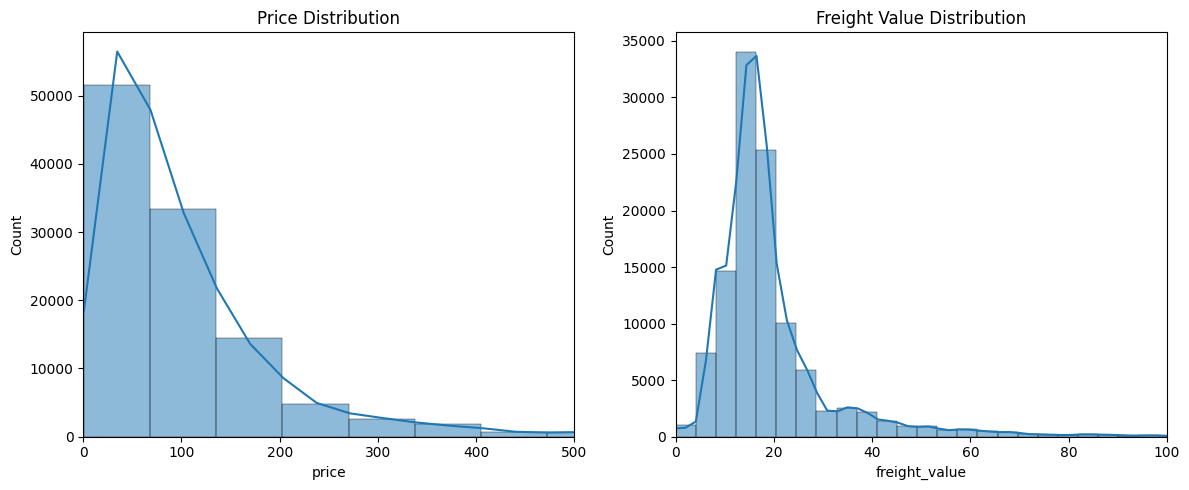

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(order_items['price'], bins=100, kde=True)
plt.title('Price Distribution')
plt.xlim(0, 500)  # 이상치 제외하고 보기 편하게 설정

plt.subplot(1, 2, 2)
sns.histplot(order_items['freight_value'], bins=100, kde=True)
plt.title('Freight Value Distribution')
plt.xlim(0, 100)  # 필요시 조정

plt.tight_layout()
plt.show()

In [69]:
merged_df = pd.merge(order_items, products, on='product_id', how='left')
merged_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


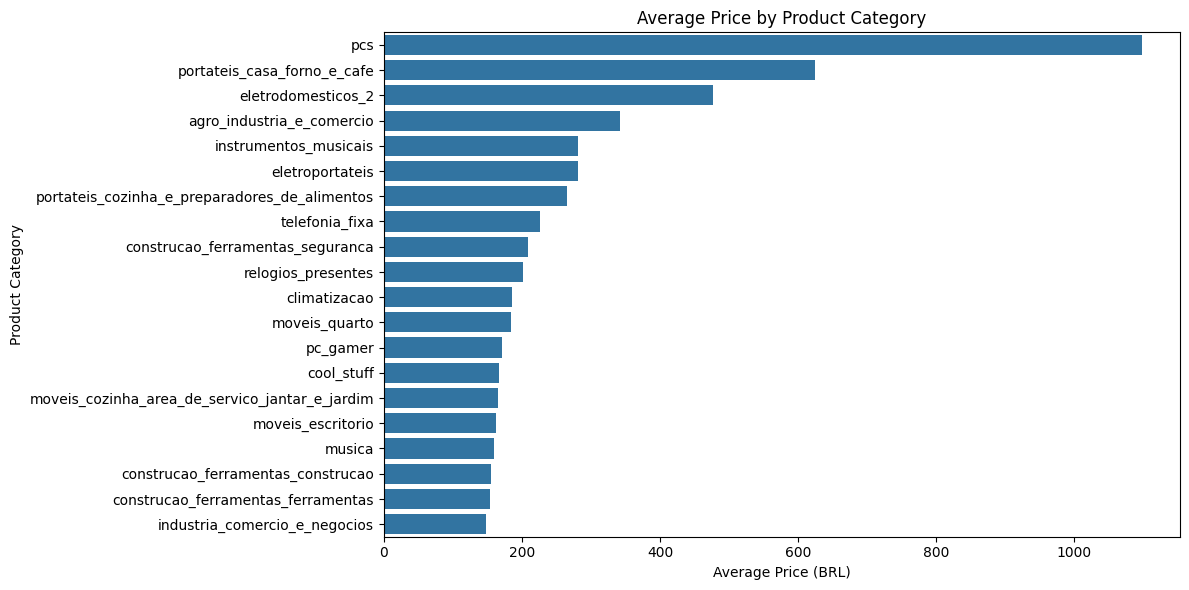

In [70]:
# 카테고리별 평균 가격 계산
avg_price_by_category = (
    merged_df.groupby('product_category_name')['price']
    .mean()
    .sort_values(ascending=False)
)[:20]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_category.values, y=avg_price_by_category.index)
plt.xlabel('Average Price (BRL)')
plt.ylabel('Product Category')
plt.title('Average Price by Product Category')
plt.tight_layout()
plt.show()

##### TABLE: orders_payments

In [71]:
# 결제 금액이 0인 행 
order_payments[order_payments['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [72]:
# 같은 order_id 확인
order_pay_zero = order_payments[order_payments['payment_value'] == 0]['order_id']
order_payments[order_payments['order_id'].isin(order_pay_zero)].sort_values(by=['order_id', 'payment_sequential'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.00
33781,45ed6e85398a87c253db47c2d9f48216,1,voucher,1,21.13
11755,45ed6e85398a87c253db47c2d9f48216,2,voucher,1,50.01
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00
40546,6ccb433e00daae1283ccc956189c82ae,1,credit_card,5,84.67
93478,6ccb433e00daae1283ccc956189c82ae,2,voucher,1,14.65
92318,6ccb433e00daae1283ccc956189c82ae,3,voucher,1,22.72
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.00
20963,8bcbe01d44d147f901cd3192671144db,1,credit_card,1,36.21


In [73]:
order_payments[(order_payments['order_id'].isin(order_pay_zero)) & (order_payments['payment_type']=='not_defined')]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [74]:
# order_id ➜ 삭제 

# 삭제 대상 order_id
drop_orders = order_payments[(order_payments['order_id'].isin(order_pay_zero)) & (order_payments['payment_type']=='not_defined')]['order_id'].tolist()

##### TABLE: order_reviews

In [75]:
# 주문 ID 기준 중복 여부 확인
dupes = order_reviews[order_reviews.duplicated(subset='review_id', keep=False)]
print(f"주문 ID 중복 리뷰 수: {len(dupes)}")

주문 ID 중복 리뷰 수: 1603


In [76]:
# 응답 시간 기준으로 정렬 후 중복 제거
order_reviews_dedup = (
    order_reviews
    .sort_values('review_answer_timestamp')
    .drop_duplicates(subset='review_id', keep='last')  # 최신 응답 기준
)

print(f"중복 제거 후 리뷰 수: {len(order_reviews_dedup)}")
print(f"고유 review_id 수: {order_reviews_dedup['review_id'].nunique()}")

중복 제거 후 리뷰 수: 98410
고유 review_id 수: 98410


In [77]:
order_reviews = order_reviews_dedup

##### TABLE: orders 

In [78]:
# orders 날짜 검증

# 승인 < 구매
mask_1 = orders['order_purchase_timestamp'] <= orders['order_approved_at']
print("정상 결제 + 결제 취소: ", orders[mask_1].shape[0] + orders[orders['order_approved_at'].isnull()].shape[0])

정상 결제 + 결제 취소:  99441


order_status 흐름
> created ➜ approved ➜ processing ➜ invoiced ➜ shipped ➜ delivered  
> 주문 접수 ➜ 결제 승인 ➜ 상품 준비중 ➜ 송장 발행됨 ➜ 배송 시작 ➜ 배송완료

In [79]:
# 배송 시작일 없는 주문 상태 확인
print(orders[orders['order_delivered_carrier_date'].isnull()]['order_status'].value_counts())

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64


대부분은 배송 전 상태로, 결측이 자연스러움  

주의: delivered인데 배송 시작일이 결측인 2건은 데이터 오류 가능성 → 검토 또는 제외 필요

In [80]:
# 전달일 누락 데이터
orders_null_carrier = orders['order_delivered_carrier_date'].isnull()
orders[(orders_null_carrier) & (orders['order_status'] == 'delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [81]:
# 배송 완료일 없는 주문 상태 확인
orders_null_delivered = orders[orders['order_delivered_customer_date'].isnull()]
print(orders_null_delivered['order_status'].value_counts())

# 8건의 delivered 결측치

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64


대부분은 배송 미완료 또는 취소 상태로 무방  

주의: delivered인데 완료일이 결측인 8건은 논리적 오류 → 검토 또는 제외 필요

In [82]:
# 배송 완료일이 없는데 상태가 완료인 데이터 확인
orders_null_delivered[orders_null_delivered['order_status'] == 'delivered']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


| 항목                      | 결측치 발견   | 조치          |
| ----------------------- | -------- | ----------- |
| `delivered`인데 배송 시작일 없음 | 2건       | 검토 또는 제거 필요 |
| `delivered`인데 배송 완료일 없음 | 8건       | 검토 또는 제거 필요 |
| 기타 상태 결측치               | 자연스러운 흐름 | 유지 가능       |
| 예상 도착일                  | 결측 없음    | 분석 활용 가능    |


##### TABLE: product_category_name_translation
-- 결측치 --  
product_category_name            0  
product_category_name_english    0  
dtype: int64  
  
-- 중복 행 수 --  
  
0  

##### TABLE: product
-- 결측치 --  
product_id                      0  
product_category_name         610  
product_name_lenght           610  
product_description_lenght    610  
product_photos_qty            610  
product_weight_g                2  
product_length_cm               2  
product_height_cm               2  
product_width_cm                2  
dtype: int64  
  
-- 중복 행 수 --  
  
0


In [83]:
# product columns rename

products = products.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})

In [84]:
products.duplicated(subset='product_id').sum()

np.int64(0)

##### TABLE: seller

-- 결측치 --  
seller_id                 0  
seller_zip_code_prefix    0  
seller_city               0  
seller_state              0  
dtype: int64  
  
-- 중복 행 수 --  
  
0  
  

In [85]:
# city 전처리
sellers['seller_city'] = sellers['seller_city'].apply(clean_city)

#### 07. 데이터 정규화

정규화(조인 및 무결성 검사) 진행
- FK-PK 조인 가능 여부
- 조인 시 누락/에러 여부 확인
- 비즈니스 로직 상 불일치 분석 (예: 리뷰는 있는데 주문은 없음)

In [86]:
# 외래 키 참조 무결성 검사 정의
fk_checks = [
    # orders
    ('orders', 'customer_id', 'customers', 'customer_id'),

    # order_items
    ('order_items', 'order_id', 'orders', 'order_id'),
    ('order_items', 'product_id', 'products', 'product_id'),
    ('order_items', 'seller_id', 'sellers', 'seller_id'),

    # order_reviews
    ('order_reviews', 'order_id', 'orders', 'order_id'),

    # order_payments
    ('order_payments', 'order_id', 'orders', 'order_id'),

    # sellers → geolocation
    ('sellers', 'seller_zip_code_prefix', 'geolocation', 'geolocation_zip_code_prefix'),

    # customers → geolocation
    ('customers', 'customer_zip_code_prefix', 'geolocation', 'geolocation_zip_code_prefix'),

    # products → product_category_name_translation
    ('products', 'product_category_name', 'product_category_name_translation', 'product_category_name')
]

# 검사 실행
results = []
for table, fk_col, ref_table, ref_col in fk_checks:
    df = dataframes[table]
    ref_df = dataframes[ref_table]
    missing = df[~df[fk_col].isin(ref_df[ref_col])]
    results.append({
        'table': table,
        'foreign_key': fk_col,
        'referenced_table': ref_table,
        'referenced_column': ref_col,
        'missing_count': len(missing),
        'missing_sample': missing[fk_col].drop_duplicates().head(3).tolist()  # 예시 3개
    })


integrity_df = pd.DataFrame(results)
integrity_df

,table,foreign_key,referenced_table,referenced_column,missing_count,missing_sample
0,orders,customer_id,customers,customer_id,0,[]
1,order_items,order_id,orders,order_id,0,[]
2,order_items,product_id,products,product_id,0,[]
3,order_items,seller_id,sellers,seller_id,0,[]
4,order_reviews,order_id,orders,order_id,0,[]
5,order_payments,order_id,orders,order_id,0,[]
6,sellers,seller_zip_code_prefix,geolocation,geolocation_zip_code_prefix,7,"[82040, 91901, 72580]"
7,customers,customer_zip_code_prefix,geolocation,geolocation_zip_code_prefix,278,"[72300, 11547, 64605]"
8,products,product_category_name,product_category_name_translation,product_category_name,623,"[nan, pc_gamer, portateis_cozinha_e_preparadores_de_alimentos]"


##### seller, customers Missing geolocation_zip_code_prefix

In [100]:
seller_geo_null = sellers[~sellers['seller_zip_code_prefix'].isin(geolocation['geolocation_zip_code_prefix'])].iloc[:, 1:]
seller_geo_null.columns = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
seller_geo_null

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
473,82040,curitiba,PR
791,91901,porto alegre,RS
1672,72580,brasilia,DF
1931,2285,sao paulo,SP
2182,7412,aruja,SP
2986,71551,brasilia,DF
3028,37708,pocos de caldas,MG


In [104]:
customers_geo_null = customers[~customers['customer_zip_code_prefix'].isin(geolocation['geolocation_zip_code_prefix'])].iloc[:, 2:]
customers_geo_null.columns = ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
customers_geo_null

,geolocation_zip_code_prefix,geolocation_city,geolocation_state
354,72300,brasilia,DF
382,11547,cubatao,SP
877,64605,picos,PI
1218,72465,brasilia,DF
1272,7729,caieiras,SP
...,...,...,...
97467,72338,brasilia,DF
97780,68629,paragominas,PA
98140,28530,sao sebastiao do paraiba,RJ
98878,55863,siriji,PE


In [124]:
concat_df = pd.concat([seller_geo_null, customers_geo_null], ignore_index=True)
concat_df.shape

(285, 3)

In [125]:
import requests
import time

def get_coordinates(city, state, api_key):
    # 브라질의 경우, 'city, state_abbr, Brazil' 형식으로 쿼리하는 것이 정확도를 높입니다.
    address = f"{city}, {state}, Brazil"
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {
        "address": address,
        "key": api_key
    }
    
    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status() # HTTP 오류 발생 시 예외 발생
        results = response.json()
        
        if results['status'] == 'OK' and results['results']:
            location = results['results'][0]['geometry']['location']
            return location['lat'], location['lng']
        elif results['status'] == 'ZERO_RESULTS':
            print(f"No results for: {address}")
        else:
            print(f"Geocoding error for {address}: {results['status']}")
            if 'error_message' in results:
                print(f"Error message: {results['error_message']}")
        return None, None
    except requests.exceptions.RequestException as e:
        print(f"Request failed for {address}: {e}")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred for {address}: {e}")
        return None, None

In [127]:
# Geo API
from dotenv import load_dotenv

load_dotenv()

API_KEY = os.getenv("GOOGLE_API_KEY")

In [128]:
# 위도, 경도 컬럼 추가
concat_df['geolocation_lat'] = None
concat_df['geolocation_lng'] = None


# 각 행에 대해 위경도 정보 가져오기
for index, row in concat_df.iterrows():
    city = row['geolocation_city']
    state = row['geolocation_state']
    
    lat, lng = get_coordinates(city, state, API_KEY)
    
    concat_df.at[index, 'geolocation_lat'] = lat
    concat_df.at[index, 'geolocation_lng'] = lng
    
    # API 호출 제한을 피하기 위해 잠시 대기
    time.sleep(0.1) # 100ms 대기

concat_df

,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,82040,curitiba,PR,-25.426899,-49.265198
1,91901,porto alegre,RS,-30.036818,-51.208989
2,72580,brasilia,DF,-15.797515,-47.891887
3,2285,sao paulo,SP,-23.555771,-46.639557
4,7412,aruja,SP,-23.395136,-46.322711
...,...,...,...,...,...
280,72338,brasilia,DF,-15.797515,-47.891887
281,68629,paragominas,PA,-2.991312,-47.353852
282,28530,sao sebastiao do paraiba,RJ,-21.756442,-42.381601
283,55863,siriji,PE,-7.653414,-35.468274


In [132]:
concat_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_city               0
geolocation_state              0
geolocation_lat                0
geolocation_lng                0
dtype: int64

In [133]:
geolocation = pd.concat([geolocation, concat_df], ignore_index=True)
geolocation.head()

,geolocation_state,geolocation_city,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,AC,acrelandia,69945,-10.059374,-67.037486
1,AC,assis brasil,69935,-10.935106,-69.557831
2,AC,brasileia,69932,-11.005941,-68.749175
3,AC,bujari,69926,-9.798651,-68.004247
4,AC,campinas,69929,-22.861615,-47.064303


##### products, product_category_name_translation Missing

In [ ]:
# products, product_category_name_translation
products[~products['product_category_name'].isin(product_category_name_translation['product_category_name'])]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [140]:
print(order_items[~order_items['product_id'].isin(products['product_id'])])
print(products[~products['product_id'].isin(order_items['product_id'])])

Empty DataFrame
Columns: [order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value]
Index: []
Empty DataFrame
Columns: [product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm]
Index: []


In [141]:
product_category_name_translation.loc[len(product_category_name_translation)] = {
    'product_category_name': 'unknown',
    'product_category_name_english': 'Unknown'
}

In [142]:
product_category_name_translation.tail(1)

,product_category_name,product_category_name_english
71,unknown,Unknown


In [143]:
# products 테이블에서 누락된 값들 'unknown'으로 대체
products['product_category_name'] = products['product_category_name'].fillna('unknown')
products.loc[
    ~products['product_category_name'].isin(product_category_name_translation['product_category_name']),
    'product_category_name'
] = 'unknown'

In [144]:
products['product_category_name'].isnull().sum()

np.int64(0)

In [148]:
product_category_name_translation.duplicated(subset='product_category_name').sum()

np.int64(0)

#### 08. 데이터 저장

In [145]:
# 대상 테이블들 
tables = {
    'orders': orders,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'customers': customers,
    'products': products,
    'sellers': sellers,
    'product_category_name_translation':product_category_name_translation,
    'geolocation': geolocation
}

# order_id가 있는 테이블만 필터링해서 저장

for name, df in tables.items():
    if 'order_id' in df.columns:
        filtered_df = df[~df['order_id'].isin(drop_orders)]
        filtered_df.to_csv(f"{DATA_DIR_CLEAN}/{name}.csv", index=False)
        print(f"{name} → cleaned 저장 완료 ({filtered_df.shape[0]} rows)")
    
    else: 
        # 정제 데이터 저장
        df.to_csv(f'{DATA_DIR_CLEAN}/{name}.csv', index=False)
        print(f"{name} ➜ 본 데이터 저장완료 ({filtered_df.shape[0]} rows)")

orders → cleaned 저장 완료 (99438 rows)
order_items → cleaned 저장 완료 (112650 rows)
order_payments → cleaned 저장 완료 (103883 rows)
order_reviews → cleaned 저장 완료 (98407 rows)
customers ➜ 본 데이터 저장완료 (98407 rows)
products ➜ 본 데이터 저장완료 (98407 rows)
sellers ➜ 본 데이터 저장완료 (98407 rows)
product_category_name_translation ➜ 본 데이터 저장완료 (98407 rows)
geolocation ➜ 본 데이터 저장완료 (98407 rows)


In [146]:
# 폴더 내 CSV 파일 로드
clean_csv_files = [f for f in os.listdir(DATA_DIR_CLEAN) if f.endswith('.csv')]
dataframes = {
    os.path.splitext(f)[0]: pd.read_csv(os.path.join(DATA_DIR_CLEAN, f))
    for f in clean_csv_files
}

for name, df in dataframes.items():
    check_data_quality(df, name)

📊 Frame: customers
-- 결측치 --
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-- 중복 행 수 --

0

-- 데이터 타입 --
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

📊 Frame: geolocation
-- 결측치 --
geolocation_state              0
geolocation_city               0
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
dtype: int64

-- 중복 행 수 --

123

-- 데이터 타입 --
geolocation_state               object
geolocation_city                object
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
dtype: object

📊 Frame: orders
-- 결측치 --
order_id                            0
customer_id                         0
order_status                     